In [116]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2021-11-01 01:48:45
"""

# -*- coding:utf-8 -*-
import cv2
import time

from PIL import Image, ImageDraw
from acl_model import Model

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [119]:
device_id = 0
model_path = "model/modify_yolov5s_out.om"

In [120]:
model = Model(device_id, model_path)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 12, 320, 320]}, 0)
model input datatype 0
model output size 3
output  0
model output dims ({'name': 'Reshape_216:0', 'dimCount': 5, 'dims': [1, 3, 85, 80, 80]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'Reshape_231:0', 'dimCount': 5, 'dims': [1, 3, 85, 40, 40]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'Reshape_246:0', 'dimCount': 5, 'dims': [1, 3, 85, 20, 20]}, 0)
model output datatype 0
[Model] class Model init resource stage success
[Model] class Model release source success
[ACL] class Sample release source success


In [121]:
img_path = "data/person.jpg"
img_org_bgr = cv2.imread(img_path)

In [122]:
%timeit -n 10 -r 2 
bboxes = model.run1(img_org_bgr)

image_np_expanded shape: (1, 12, 320, 320)
img_numpy shape: (1, 12, 320, 320)
93916734264944
img_buf_size 4915200
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [123]:
img = Image.open(img_path)

In [124]:
img1 = ImageDraw.Draw(img)
for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=2)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])

[190.0, 96.0, 274.0, 378.0] 0.92354923 0 person
[64.0, 265.0, 206.0, 349.0] 0.905717 16 dog
[405.0, 138.0, 600.0, 352.0] 0.88476676 17 horse


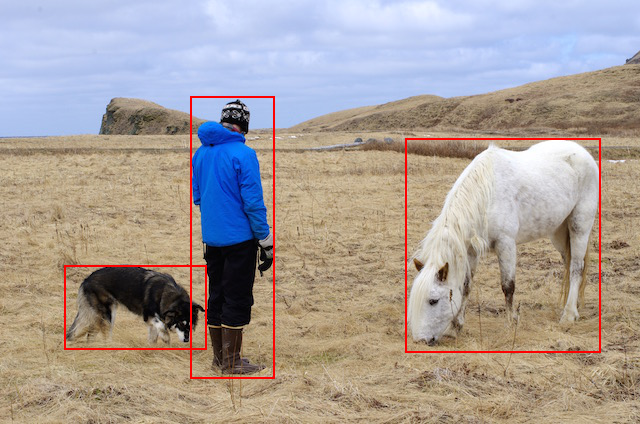

In [125]:
img